# Main Imports

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from matplotlib.ticker import MultipleLocator
import re
import os

# import data
file_cell_based_10x = os.path.join("..", "clean-files", "UL", "throughput", "3rd-attempt", "Cell-based-10ues.txt")
file_cell_free_10x = os.path.join("..", "clean-files", "UL", "throughput", "3rd-attempt", "Cell-free-10ues.txt")


## Calculations for 10X Scenarios

In [24]:
# Read content of the file
with open(file_cell_based_10x, "r") as f:
    linhas_cb = [linha.strip() for linha in f if linha.strip()]

# Regex to extract throughput values, through dictionary
dados_ues_cb = defaultdict(list)

for linha in linhas_cb:
    match = re.match(r"\[UE (\d+) \| RB \d+\] Throughput = ([\d\.]+)", linha)
    if match:
        ue = int(match.group(1))
        throughput = float(match.group(2))
        dados_ues_cb[ue].append(throughput)

# Create DataFrames for each UE 
dfs_cb = {}
for ue, valores in dados_ues_cb.items():
    tempo = [i * 10 for i in range(len(valores))] 
    df_cb = pd.DataFrame({
        "Time (ms)": tempo,
        "Throughput (Mbps)": valores
    })
    df_cb["Rolling Avg (Mbps)"] = df_cb["Throughput (Mbps)"].rolling(window=5).mean()
    dfs_cb[ue] = df_cb


# Read content of the file
with open(file_cell_free_10x, "r") as f:
    linhas_cf = [linha.strip() for linha in f if linha.strip()]

# Regex to extract throughput values, through dictionary
dados_ues_cf = defaultdict(list)

for linha in linhas_cf:
    match = re.match(r"\[UE (\d+) \| RB \d+\] Throughput = ([\d\.]+)", linha)
    if match:
        ue = int(match.group(1))
        throughput = float(match.group(2))
        dados_ues_cf[ue].append(throughput)

# Create DataFrames for each UE 
dfs_cf = {}
for ue, valores in dados_ues_cf.items():
    tempo = [i * 10 for i in range(len(valores))] 
    df_cf = pd.DataFrame({
        "Time (ms)": tempo,
        "Throughput (Mbps)": valores
    })
    df_cf["Rolling Avg (Mbps)"] = df_cf["Throughput (Mbps)"].rolling(window=5).mean()
    dfs_cf[ue] = df_cf

# Sole behavior graphics

## Cell-Based 10x UE Throughput x Time

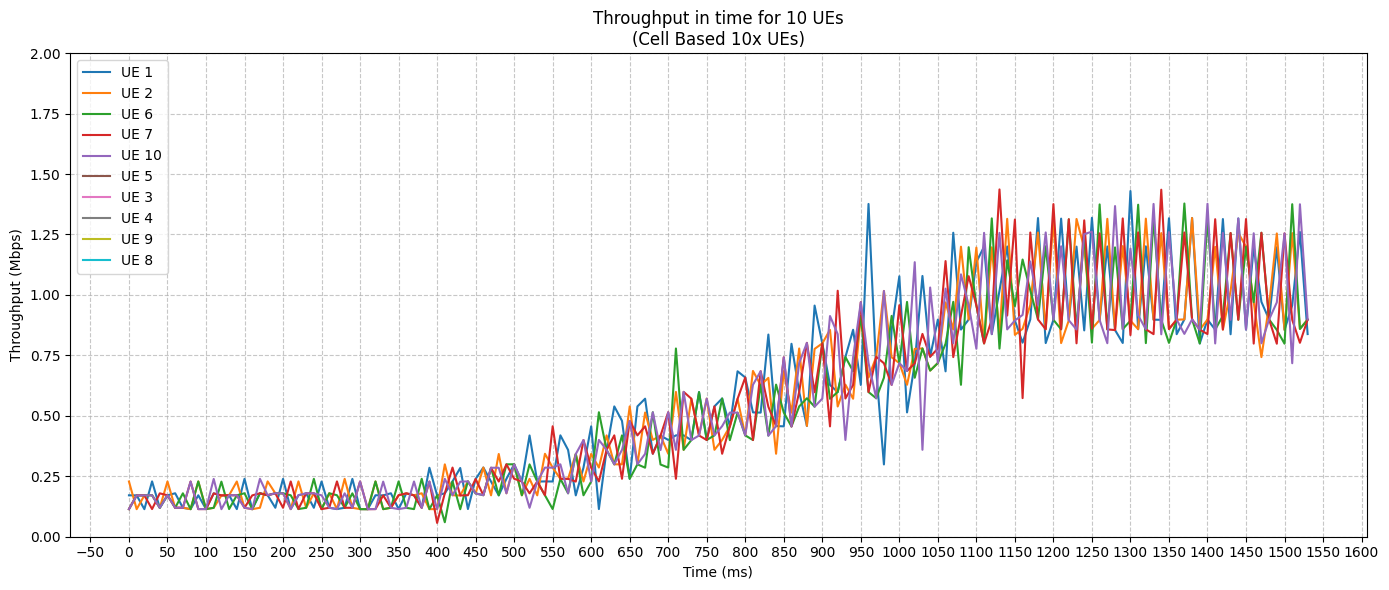

In [25]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cb.items():
    sns.lineplot(x="Time (ms)", y="Throughput (Mbps)", data=df, label=f"UE {ue}")
plt.title("Throughput in time for 10 UEs\n(Cell Based 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.gca().xaxis.set_major_locator(MultipleLocator(50))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

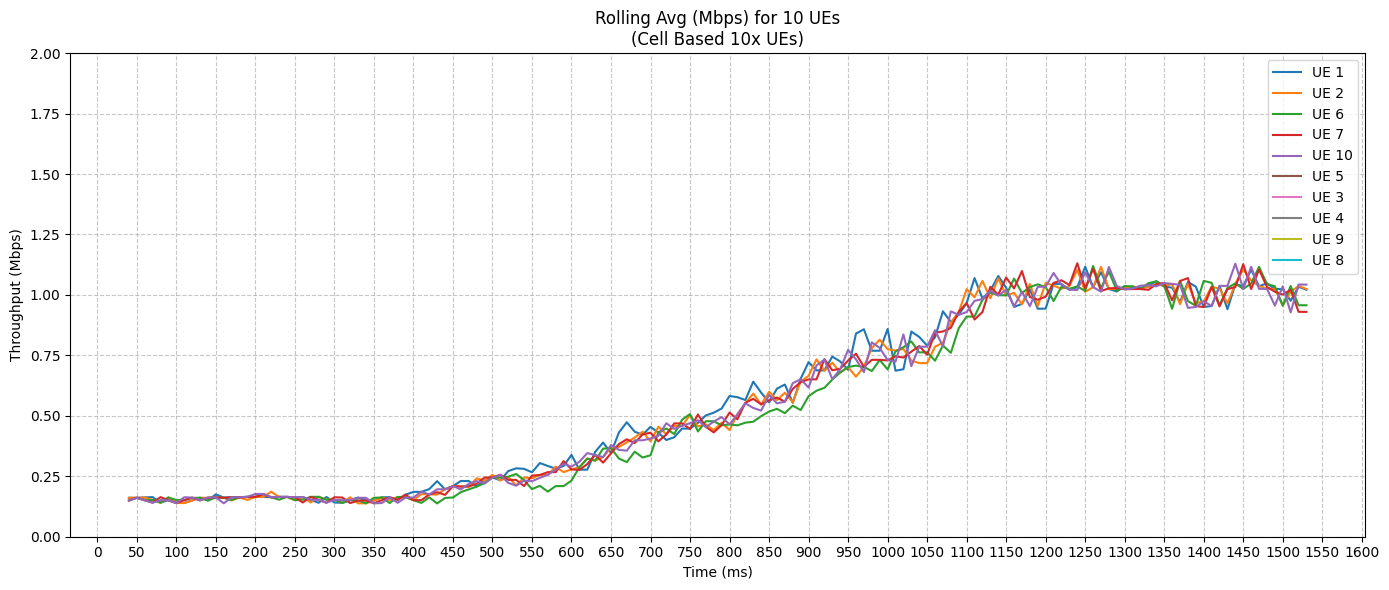

In [26]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cb.items():
    sns.lineplot(x="Time (ms)", y="Rolling Avg (Mbps)", data=df, label=f"UE {ue}")
plt.title("Rolling Avg (Mbps) for 10 UEs\n(Cell Based 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.gca().xaxis.set_major_locator(MultipleLocator(50))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Cell-Free 10x UE Throughput x Time

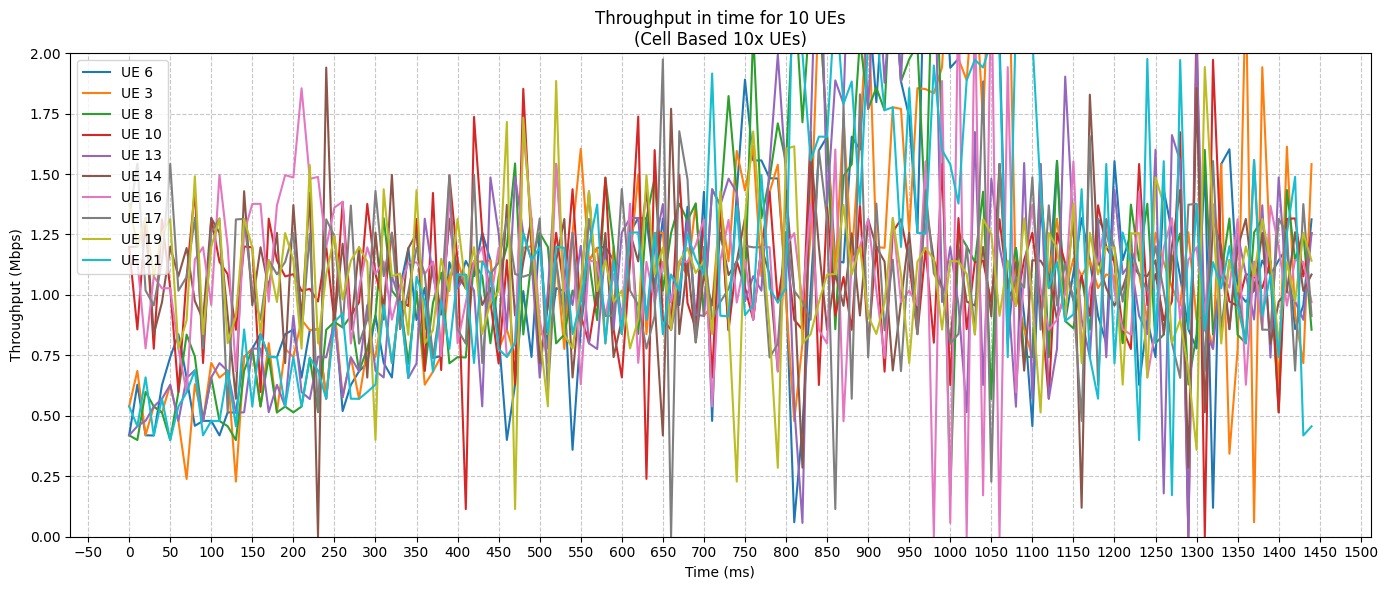

In [17]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cf.items():
    sns.lineplot(x="Time (ms)", y="Throughput (Mbps)", data=df, label=f"UE {ue}")
plt.title("Throughput in time for 10 UEs\n(Cell Based 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.gca().xaxis.set_major_locator(MultipleLocator(50))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

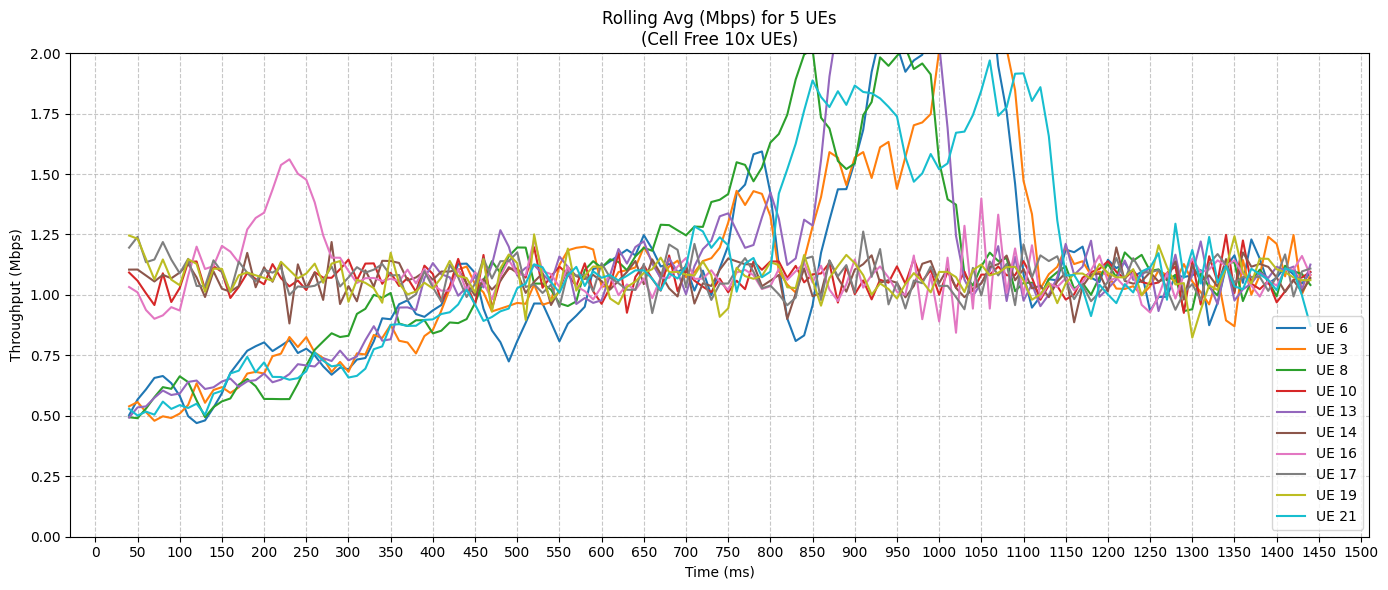

In [27]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cf.items():
    sns.lineplot(x="Time (ms)", y="Rolling Avg (Mbps)", data=df, label=f"UE {ue}")
plt.title("Rolling Avg (Mbps) for 5 UEs\n(Cell Free 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.gca().xaxis.set_major_locator(MultipleLocator(50))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Comparisons between Cell-Free and Cell-based

## Rolling Average Comparison

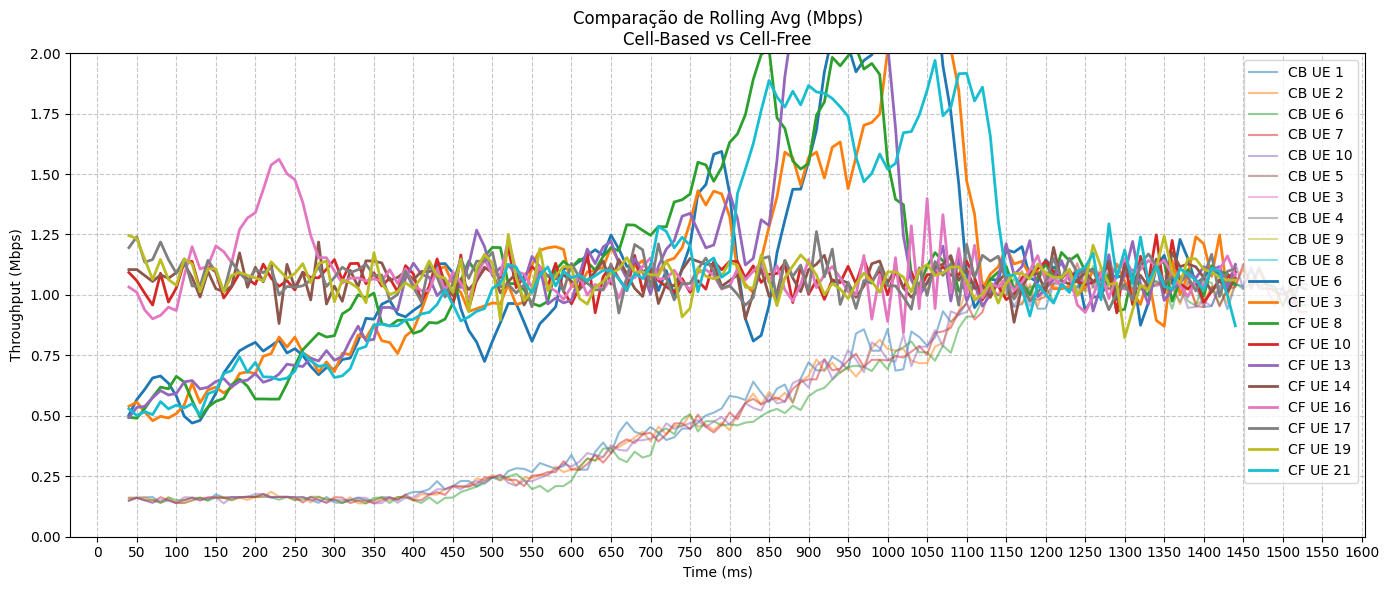

In [37]:
# Graphic of Throughput and Rolling Average for comparison
plt.figure(figsize=(14, 6))

# Cell-Based
for ue, df in dfs_cb.items():
    sns.lineplot(x="Time (ms)", y="Rolling Avg (Mbps)", data=df, label=f"CB UE {ue}", alpha=0.5)

# Cell-Free
for ue, df in dfs_cf.items():
    sns.lineplot(x="Time (ms)", y="Rolling Avg (Mbps)", data=df, label=f"CF UE {ue}", linewidth=2.0)

plt.title("Comparação de Rolling Avg (Mbps)\nCell-Based vs Cell-Free")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()
plt.ylim(0, 2)
plt.gca().xaxis.set_major_locator(MultipleLocator(50))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Total mean of rolling avg comparison

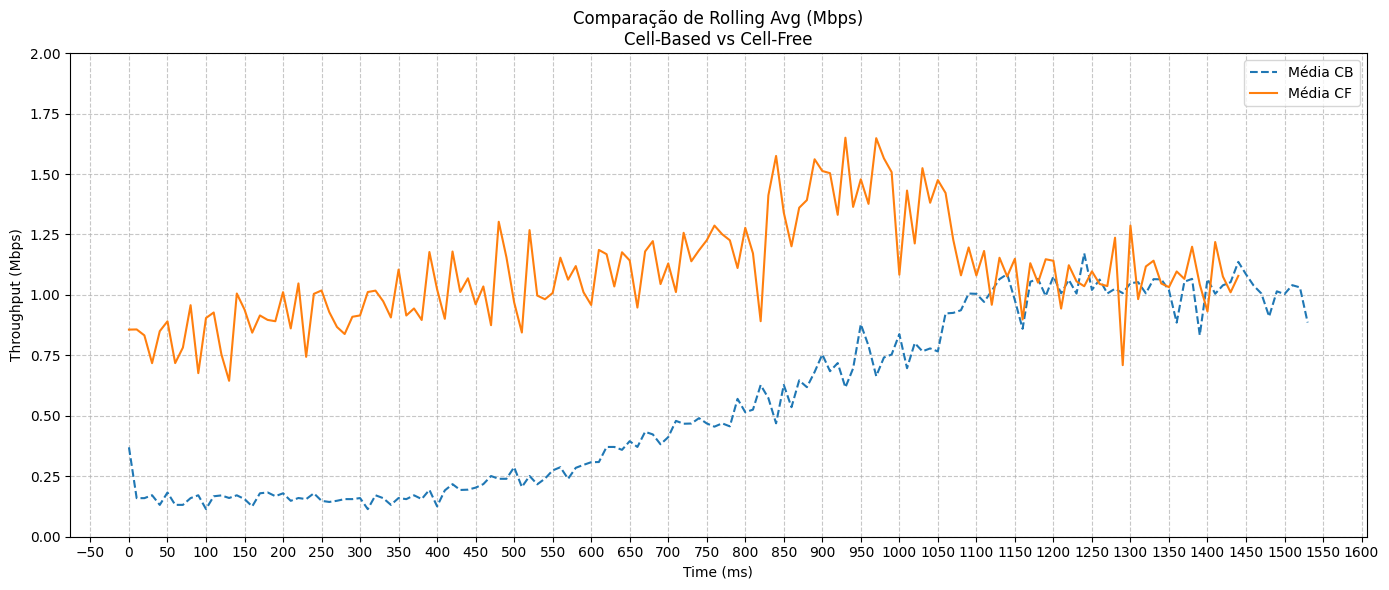

In [ ]:
mean_cb = pd.concat(dfs_cb.values()).groupby("Time (ms)")["Throughput (Mbps)"].mean()
mean_cf = pd.concat(dfs_cf.values()).groupby("Time (ms)")["Throughput (Mbps)"].mean()

plt.figure(figsize=(14, 6))

plt.plot(mean_cb.index, mean_cb.values, label="Mean CB", linestyle='--')
plt.plot(mean_cf.index, mean_cf.values, label="Mean CF", linestyle='-')

plt.title("Comparação de Rolling Avg (Mbps)\nCell-Based vs Cell-Free")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()
plt.ylim(0, 2)
plt.gca().xaxis.set_major_locator(MultipleLocator(50))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Boxplot of throughput

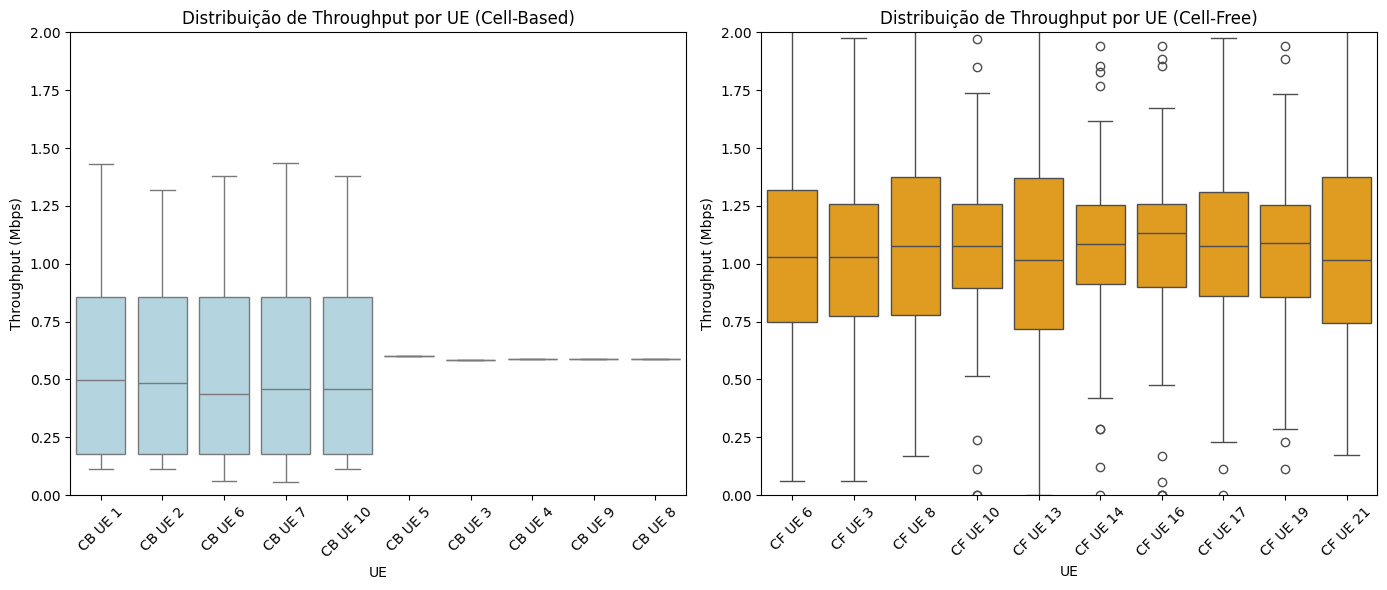

In [45]:
# Concatenate all DataFrames for Cell-Based and Cell-Free UEs
df_cb_all = pd.concat([
    df.assign(UE=f"CB UE {ue}") for ue, df in dfs_cb.items()
], ignore_index=True)

df_cf_all = pd.concat([
    df.assign(UE=f"CF UE {ue}") for ue, df in dfs_cf.items()
], ignore_index=True)

# Boxplot graphic for Throughput by UE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="UE", y="Throughput (Mbps)", data=df_cb_all, color="lightblue")
plt.title("Distribuição de Throughput por UE (Cell-Based)")
plt.xticks(rotation=45)
plt.ylim(0, 2)

plt.subplot(1, 2, 2)
sns.boxplot(x="UE", y="Throughput (Mbps)", data=df_cf_all, color='orange')
plt.title("Distribuição de Throughput por UE (Cell-Free)")
plt.xticks(rotation=45)
plt.ylim(0, 2)

plt.tight_layout()
plt.show()

## Heatmap of throughput per scene

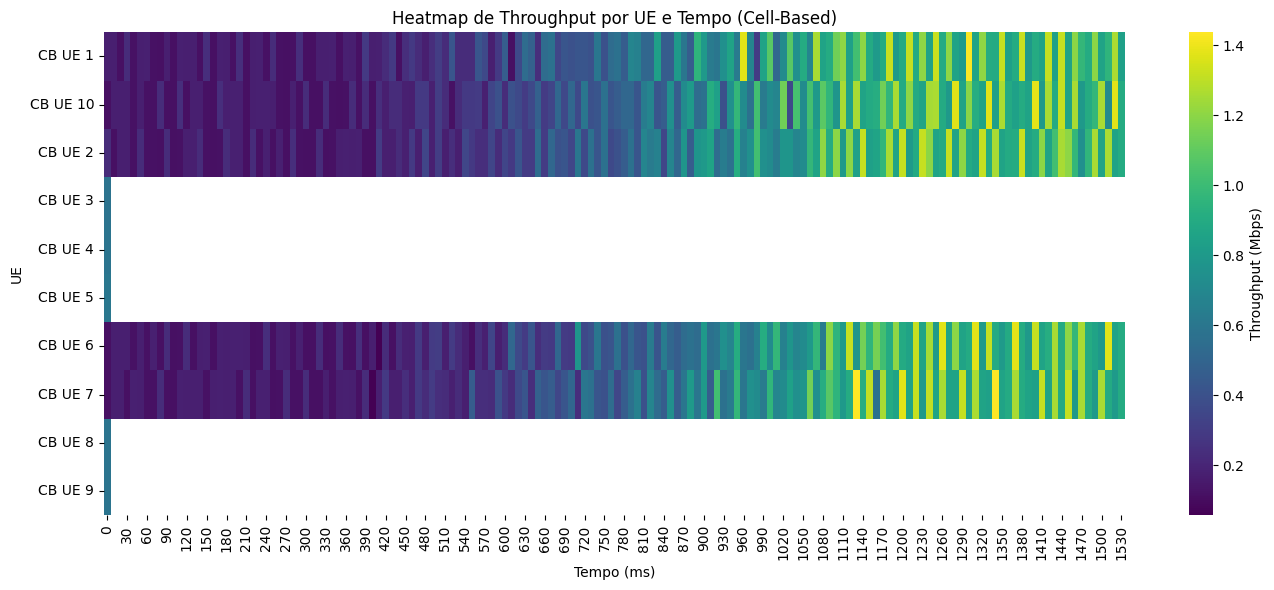

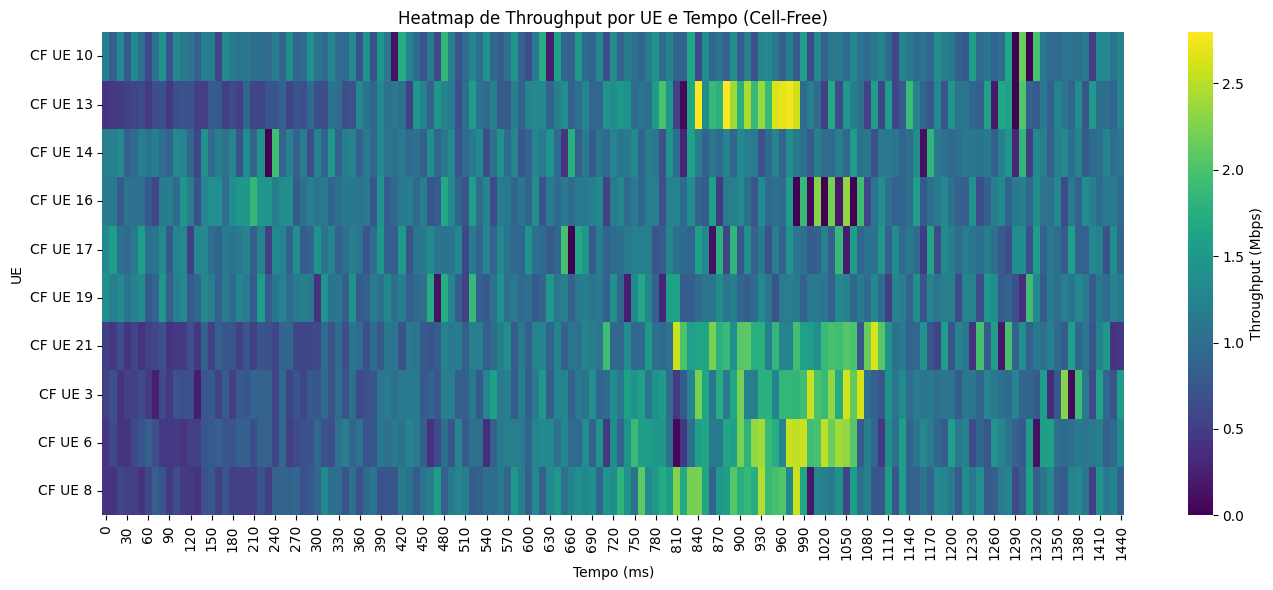

In [49]:
heat_cb = df_cb_all.pivot(index="UE", columns="Time (ms)", values="Throughput (Mbps)")
heat_cf = df_cf_all.pivot(index="UE", columns="Time (ms)", values="Throughput (Mbps)")

# Plot Cell-Based
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cb, cmap="viridis", cbar_kws={'label': 'Throughput (Mbps)'})
plt.title("Heatmap de Throughput por UE e Tempo (Cell-Based)")
plt.xlabel("Tempo (ms)")
plt.ylabel("UE")
plt.tight_layout()
plt.show()

# Plot Cell-Free
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cf, cmap="viridis", cbar_kws={'label': 'Throughput (Mbps)'})
plt.title("Heatmap de Throughput por UE e Tempo (Cell-Free)")
plt.xlabel("Tempo (ms)")
plt.ylabel("UE")
plt.tight_layout()
plt.show()

## Main statistics 10x Scenarios

### Cell-Based

In [35]:
df_todos_cb = pd.concat(dfs_cb.values(), ignore_index=True)
print(df_todos_cb["Throughput (Mbps)"].describe())

count    775.000000
mean       0.558159
std        0.382912
min        0.057070
25%        0.179610
50%        0.458130
75%        0.857435
max        1.436300
Name: Throughput (Mbps), dtype: float64


### Cell-Free

In [36]:
df_todos_cf = pd.concat(dfs_cf.values(), ignore_index=True)
print(df_todos_cf["Throughput (Mbps)"].describe())

count    1450.000000
mean        1.093205
std         0.424052
min         0.000000
25%         0.837583
50%         1.076895
75%         1.312530
max         2.795750
Name: Throughput (Mbps), dtype: float64
